In [ ]:
from google.colab import files
files.upload()

Saving HR.csv to HR.csv


{'HR.csv': b'satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary\r\n0.38,0.53,2,157,3,0,1,0,sales,low\r\n0.8,0.86,5,262,6,0,1,0,sales,medium\r\n0.11,0.88,7,272,4,0,1,0,sales,medium\r\n0.72,0.87,5,223,5,0,1,0,sales,low\r\n0.37,0.52,2,159,3,0,1,0,sales,low\r\n0.41,0.5,2,153,3,0,1,0,sales,low\r\n0.1,0.77,6,247,4,0,1,0,sales,low\r\n0.92,0.85,5,259,5,0,1,0,sales,low\r\n0.89,1,5,224,5,0,1,0,sales,low\r\n0.42,0.53,2,142,3,0,1,0,sales,low\r\n0.45,0.54,2,135,3,0,1,0,sales,low\r\n0.11,0.81,6,305,4,0,1,0,sales,low\r\n0.84,0.92,4,234,5,0,1,0,sales,low\r\n0.41,0.55,2,148,3,0,1,0,sales,low\r\n0.36,0.56,2,137,3,0,1,0,sales,low\r\n0.38,0.54,2,143,3,0,1,0,sales,low\r\n0.45,0.47,2,160,3,0,1,0,sales,low\r\n0.78,0.99,4,255,6,0,1,0,sales,low\r\n0.45,0.51,2,160,3,1,1,1,sales,low\r\n0.76,0.89,5,262,5,0,1,0,sales,low\r\n0.11,0.83,6,282,4,0,1,0,sales,low\r\n0.38,0.55,2,147,3,0,1,0,sales,low\r\n0.09,0.95,6,304,4,0,1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Признаки:**

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

**1.Загрузите файл HR.csv в pandas dataframe**

In [ ]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)**

In [ ]:
df.info()
# всего в таблице 14999 строк и 10 столбцов, 8 из которых - числовые (можем посчитать основные статистики) и 2 - текстовые (отдел, категория зарплаты)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# с помощью встроенной функции рассчитаем стандартные метрики: среднее  - mean, медиана - 50%, мин/мах, сред.отклонение - std.
# Судя по этим метрикам выбросов в данных нет
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Вручную рассчитаем моду 
moda = pd.DataFrame({'satisfaction_level': df['satisfaction_level'].mode(),'last_evaluation' : df['last_evaluation'].mode(), 'number_project': df['number_project'].mode(), \
                    ' average_montly_hours': df['average_montly_hours'].mode(), 'time_spend_company' : df['time_spend_company'].mode(), 'Work_accident': df['Work_accident'].mode(), \
                     'left': df['left'].mode(), 'promotion_last_5years': df['promotion_last_5years'].mode(), 'department': df['department'].mode(), 'salary': df['salary'].mode()})

In [ ]:
moda
# В соответствии с наиболее часто встречающимся значениями можно сказать, что компания не очень дружелюбная по отношению к сотрудникам: 
# уровень удовлетворенности работой - 0.1, средее кол-во часов (две моды: 135 и 156) - это меньше средней месячной нормы (160), стаж работы - 3 года,  зарплата - низкая.
# Другое предположение: часто встречается отдел sales, возможно такая ситуация только в нем


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные.**

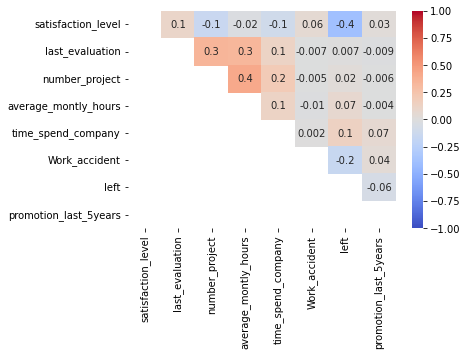

In [ ]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center= 0, cmap = 'coolwarm', mask = mask, fmt = '.1g' )
# Выводы:
# самые скоррелированные переменные: satisfaction_level и left (обратная связь) - чем ниже уровень удовлетворенности, тем выше увольнения, number_project и  average_montly_hours (прямая связь) - чем больше проектов, тем больше среднее кол-во часов
# самые наименее скоррелированные переменные: average_montly_hours и promotion_last_5years, time_spend_company и Work_accident. Это значит, что
# повышение сотрудника не зависит от кол-ва отработанных часов в месяц, а несчастные случаи не зависят от стажа

**4.Рассчитайте сколько сотрудников работает в каждом департаменте.**

In [ ]:
df.groupby('department')['satisfaction_level'].count().sort_values()
# самый малочисленный - management, самый многочисленный - sales. Логично

department
management      630
hr              739
accounting      767
RandD           787
marketing       858
product_mng     902
IT             1227
support        2229
technical      2720
sales          4140
Name: satisfaction_level, dtype: int64

**5.Показать распределение сотрудников по зарплатам.**

In [ ]:
df.groupby('salary')['satisfaction_level'].count().sort_values()
# сильно отличается кол-во зарплат категорий medium и low от high. 

salary
high      1237
medium    6446
low       7316
Name: satisfaction_level, dtype: int64

**6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [ ]:
df.groupby(['department', 'salary'])['satisfaction_level'].count()
# в каждом отделе представлены все категории зарплат, также преобладают low и medium во всех отделах кроме management

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

**7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

In [ ]:
df_low = df[df['salary'] == 'low']['average_montly_hours']
df_low 

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

In [ ]:
df_high = df[df['salary'] == 'high']['average_montly_hours']
df_high

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

(array([ 46.,  80., 170., 192., 141., 160., 159., 167., 106.,  16.]),
 array([ 96. , 117.1, 138.2, 159.3, 180.4, 201.5, 222.6, 243.7, 264.8,
        285.9, 307. ]),
 <a list of 10 Patch objects>)

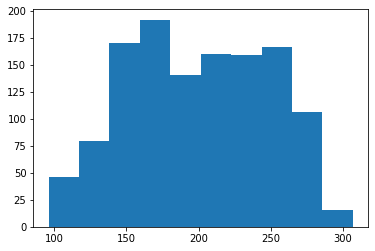

In [ ]:
plt.hist(df_high)


(array([ 164.,  635., 1407.,  823.,  746.,  804.,  892., 1083.,  559.,
         203.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <a list of 10 Patch objects>)

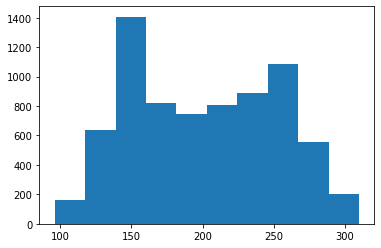

In [ ]:
plt.hist(df_low)

Для сравнения несвязанных выборок будем применять t-критерий Стъюдента.
Проверим ограничения:
1. распределения близки к нормальным
2. различия в дисперсиях, если они есть, устраним за счет автоматической поправки


H0: нет различий в количестве отработанных часов в месяц между сотрудниками с высоким и низким окладом (средние значения двух выборок равны)

Н1: есть различия в кол-ве отработанных часов в месяц в зависимости от уровня оклада

In [ ]:
print(df_high.mean())
print(df_low.mean())

alpha = 0.05
t, p_value = stats.ttest_ind(df_high, df_low, equal_var= False)
t, p_value

if p_value < alpha:
    print('Нулевую гипотезу отклоняем, различия между средним кол-ом отработанных часов статистически значимы на уровне 5%')
else:
    print('Нулевую гипотезу принимаем, отсутствуют статистически значимые отличия между средним кол-ом отработанных часов')


# Вывод: предположение о том, что сотрудники с более высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом - неверно

199.86742118027485
200.9965828321487
Нулевую гипотезу принимаем, отсутствуют статистически значимые отличия между средним кол-ом отработанных часов


**8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):**

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов

In [ ]:
df_left_yes = df[df['left'] == 1]
df_left_no= df[df['left'] == 0]

In [ ]:
df_left_yes.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
a_yes = df_left_yes['promotion_last_5years'].mean()
b_yes = df_left_yes['satisfaction_level'].mean()
c_yes = df_left_yes['number_project'].mean()

In [ ]:
a_no = df_left_no['promotion_last_5years'].mean()
b_no= df_left_no['satisfaction_level'].mean()
c_no= df_left_no['number_project'].mean()

In [ ]:
df_question_8 = pd.DataFrame({'promotion_last_5years': [a_yes, a_no], 'satisfaction_level' : [b_yes,b_no], 'number_project': [c_yes, c_no]}, index= ['left_yes', 'left_no'])
df_question_8

# Вывод: уволившиеся сотрудник  имели в среднем меньше повышений за последние 5 лет, ниже уровень удовлетворенности, но больше проектов, чем оставшиеся в компании сотрудники

,promotion_last_5years,satisfaction_level,number_project
left_yes,0.005321,0.440098,3.855503
left_no,0.026251,0.666810,3.786664


9. Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборки

In [ ]:
target = df['left'].to_numpy()
target

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
variables = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]


In [ ]:
# данные разных масшатбов, необходимо их нормализировать
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# модель стандартизирует данные, используя μ и σ
X_scaled= scaler.fit_transform(variables)

In [ ]:
# разделим выборку на две части: тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size = 0.25)

In [ ]:
# построим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.describe()

# По результатам видно, что сильно отличается средние значения (то есть доля уволившихся) между реальными данными (столбец 0) и тестовыми (столбец 1).
# Может быть связано с тем, что изначально доли неравномерные (оставшихся сотрудников гораздо больше, чем уволившихся), поэтому модель намеренно выбирает, что сотрудник не уволился -0
# По матрице корреляций видно, что left сильно ни с чем не коррелирует (-0.4 - максимальный показатель корреляции с satisfaction_level), то есть факторы не описывают эту переменную должным образом 


,0,1
count,3750.000000,3750.000000
mean,0.233333,0.111200
std,0.423009,0.314422
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
df['left'].mean()

0.2380825388359224

In [ ]:
# Проверим качество модели
# Не очень высокая предсказывающая способность, причины выше
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7642666666666666

In [ ]:
# Проведем кросс-валидацию модели, чтобы получить более объективные оценки accuracy, которые сейчас сильно варьируются в зависимости от разбивки выборки
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
target.mean()

0.2380825388359224

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state = 1)

In [ ]:
scores = cross_val_score(lda, X_scaled, target,  scoring = 'accuracy', cv = cv, n_jobs= -1)

In [ ]:
print(np.mean(scores))
# Объективный показатель accuracy, по которому можно сравнивать несколько моделей

0.7615171002890816
